# Factor Analysis

### Confusion with Principal Component Analysis

There is sometimes confusion between principal component analysis (PCA) and factor analysis (FA). Both methods have the aim of reducing the dimensionality of a vector of random variables. However, the most fundamental difference is that factor analysis explicitly specifies a model relating the observed variables to a smaller set of underlying unobservable factors. This assumed model may fit the data or not. In contrast PCA is just a data transformation method. Furthermore while Factor Analysis aims at explaining (covariances) or correlations, PCA concentrates on variances.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn import preprocessing

plt.rcParams["figure.figsize"] = (12, 9)

In [3]:
# Download the dataset
data_set = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M1/fin_data_set.csv")

### **1.2 Impact of Measurement Error in Linear Regression**
Now, let's look at the variables with measurement error in a linear regression model. What can happen to coefficient estimates when variables in a linear regression model have measurement errors? 

#### **1.2.1 Dependent Variable with Measurement Error**
If the dependent variable in a linear regression has measurement error, the coefficient estimates are still unbiased. However, the **variances** of the **coefficient estimates** will be larger and the confidence intervals for coefficient estimates will be wider. Hence, the estimates will be less stable. Figure 1 shows the consequence of a dependent variable with measurement error and the confidence intervals. The blue dotted line is the confidence interval without measurement error. The red dotted line represents the confidence interval with measurement error.

**Figure 1: Dependent Variable and Measurement Error in a Linear Regression Model**


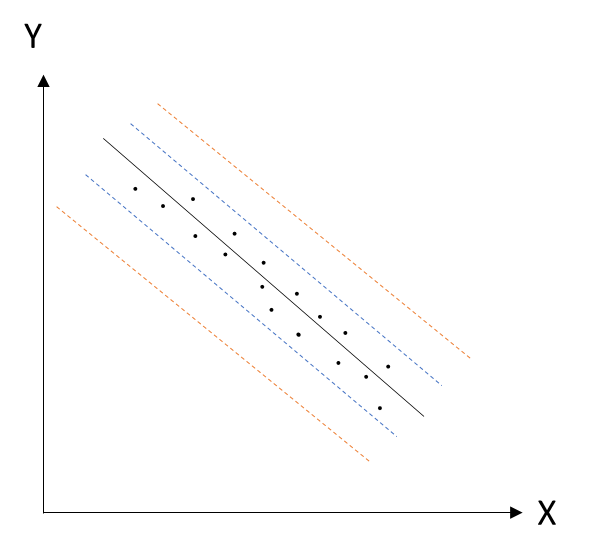



#### **1.2.2 Independent Variables with Measurement Error**

If an independent variable in a linear regression has measurement error, the **coefficient estimate** of the independent variable will be **biased**. Figure 2 demonstrates different regression lines for the independent variable with and without measurement error. The black solid line is the independent variable without measurement error. The black dotted line is the independent variable with measurement error. We can see now that the slope for the black solid line and the slope for the black dotted line are different. The slopes represent coefficient estimates for two linear regression models.

Biased coefficient estimate $\hat{\beta_1}$ will result in a different slope.

**Figure 2: Independent Variable and Measurement Error in a Linear Regression Model**

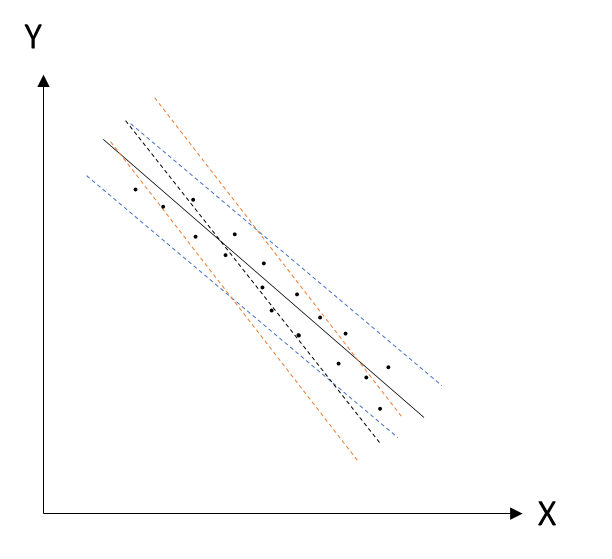



In [6]:
# standardise data
data = data_set[
    [
        "Dow_Q_EX_R",
        "Pepsi_Q_EX_R",
        "REV_Q_R",
        "GOOG_Q_EX_R",
        "BAC_Q_EX_R",
        "WMT_Q_EX_R",
        "GE_Q_EX_R",
        "SBUX_Q_EX_R",
    ]
]
data_normal = preprocessing.StandardScaler().fit_transform(data)
df = pd.DataFrame(data_normal, columns=[data.columns])
df

,Dow_Q_EX_R,Pepsi_Q_EX_R,REV_Q_R,GOOG_Q_EX_R,BAC_Q_EX_R,WMT_Q_EX_R,GE_Q_EX_R,SBUX_Q_EX_R
0,0.073337,0.532797,0.989909,0.396419,-0.476096,0.710378,0.196184,-0.013410
1,-0.771220,-0.544144,-0.714964,-0.520064,0.505964,-1.002043,-0.228827,-1.181536
2,0.986151,-0.780647,-1.025735,-0.575517,2.078527,-1.087855,0.235574,0.072224
3,0.325261,0.991693,-0.310856,0.667382,-0.245346,1.149797,-0.008063,0.529930
4,0.174021,0.080837,0.495662,-0.471609,-0.231357,0.322862,-0.514026,-1.347039
5,0.530194,-1.139401,-0.594384,0.200944,0.474163,0.671270,-1.032280,-0.187255
6,1.327077,0.966683,-1.513089,0.792534,0.684620,2.319653,-0.968584,0.010759
7,-1.791148,-2.697955,0.080643,-2.112064,-0.907733,-2.737909,-0.596667,-0.219170
8,0.239304,1.678845,1.400468,1.249190,-0.250559,-0.427501,-0.059716,-1.248832
9,-0.787428,-0.700054,-0.696971,-1.970574,-1.211502,1.045357,-1.301565,0.762951


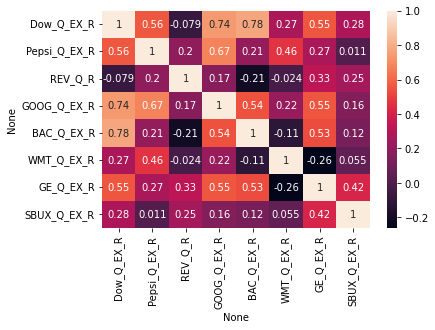

In [7]:
# Correlation plot of all the variables
c = df.corr()
sns.heatmap(c, annot=True)
plt.show()

In [9]:
# Create 8-factor object and fit data
fa1 = FactorAnalyzer(8, rotation=None)
fact_res = fa1.fit(df)

# Get Eigenvalues
ev, v = fact_res.get_eigenvalues()
ev  # eigenvalues

array([3.34031405, 1.54629398, 1.37192323, 0.8709355 , 0.33599621,
       0.22644586, 0.21514209, 0.09294909])

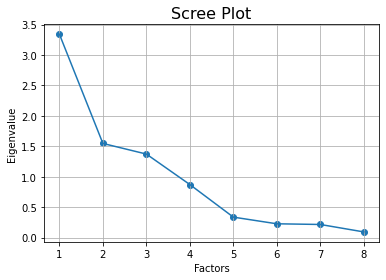

In [10]:
# Visualize eigenvalues on scree plot
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)
plt.title("Scree Plot", {"size": 16})
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

How do we decide how many factors to consider in the final model? Results of eigenvalues and visualized Scree plot help us decide number of factors. In the Scree plot we can see that 3 eigenvalues are greater than 1 which in itself means that we need to chose 3-factor model. 

The following code performs 3-factor analysis:

In [11]:
# Create 3-factor object and fit data
fa3 = FactorAnalyzer(3, rotation=None)
fact_res3 = fa3.fit(df)

# Get uniquenesses
pd.DataFrame(fact_res3.get_uniquenesses(), index=[data.columns], columns=["uniquenesses"])

,uniquenesses
Dow_Q_EX_R,0.079078
Pepsi_Q_EX_R,0.264248
REV_Q_R,0.520481
GOOG_Q_EX_R,0.280050
BAC_Q_EX_R,0.127822
WMT_Q_EX_R,0.541239
GE_Q_EX_R,0.004280
SBUX_Q_EX_R,0.837030


Let's look what the results tell us. The first section of the result is uniqueness. There is a number for each variable under uniqueness. This number is the ratio of unique variance over total variance of a variable, meaning how much of the total variance that this 3-factor model cannot explain. For Dow 30 excess return, the uniqueness is 0.079. It means there is only 7.9% of the total variance of the Dow 30 excess return that this 3-factor model cannot explain. It is a good result for the Dow 30 excess return. For Starbucks's excess return, the uniqueness is 0.837. It means that there is 83.7% of the variance of the Starbucks excess return that this 3-factor model cannot explain. This 3 factor model does a poor job for Starbucks's excess return. The ratio of the communality over the total variance of a variable is 1, uniqueness by definition. For example, Pepsi's ratio of communality over total variance is 1 – 0.264 = 0.736. It means the 3-factor model can explain 74% of Pepsi's total variance.

Next, let's look at the loadings. 


In [14]:
# Get Factor Loadings
pd.DataFrame(fact_res3.loadings_, index=[data.columns], columns=["Factor 1", "Factor 2", "Factor 3"])

,Factor 1,Factor 2,Factor 3
Dow_Q_EX_R,0.920076,0.118572,-0.245608
Pepsi_Q_EX_R,0.630328,0.532742,0.233719
REV_Q_R,0.130559,-0.105148,0.671876
GOOG_Q_EX_R,0.826906,0.169454,0.086381
BAC_Q_EX_R,0.735692,-0.257961,-0.514190
WMT_Q_EX_R,0.167506,0.653097,0.064548
GE_Q_EX_R,0.756477,-0.578518,0.297959
SBUX_Q_EX_R,0.280147,-0.190166,0.219827


The loading for Dow 30 excess return from factor 1 is 0.92. Factor 1 very well explains all the variance from Dow 30 excess return. Factor 1 also explains variances for Google's excess return and Bank of America's excess return pretty well. Factor 1 does poorly in explaining Walmart's and Starbucks's excess return variation.

For our example factor 1, Dow 30, Google and Bank of America have high loadings. For factor 2, Walmart and Pepsi have a high loading. For factor 3, KO's revenue growth has the highest loading.

Let's now look at Sum of Squared loadings and Proportional variances. 


In [15]:
# Get proportion variance and cumulative proportion variance
pd.DataFrame(
    fact_res3.get_factor_variance(),
    index=["Sum of squared loadings", "Proportional variance", "Cumulative variance"],
    columns=["Factor 1", "Factor 2", "Factor 3"],
)

,Factor 1,Factor 2,Factor 3
Sum of squared loadings,3.164713,1.201570,0.979488
Proportional variance,0.395589,0.150196,0.122436
Cumulative variance,0.395589,0.545785,0.668221


### **2.4 Rotation**
One of the good things about factor analysis is that you can rotate the axes of the factors. Rotation usually makes only one factor highly associated with one or a small amount of initial variables. It simplifies the factor-variable structure and helps with interpretation of the factors. Rotation will not change the model results as to how much the model explains the total variance of the whole variables. 

There are two types of rotation methods to choose from. The first one is called **varimax**. Varimax rotates the axes to make the factors uncorrelated. The second one is called **promax**. Promax rotation allows factors to be correlated. Figure 6 demonstrates the visual difference between the two rotation methods.

**Figure 6: Varimax Rotation vs. Promax Rotation**


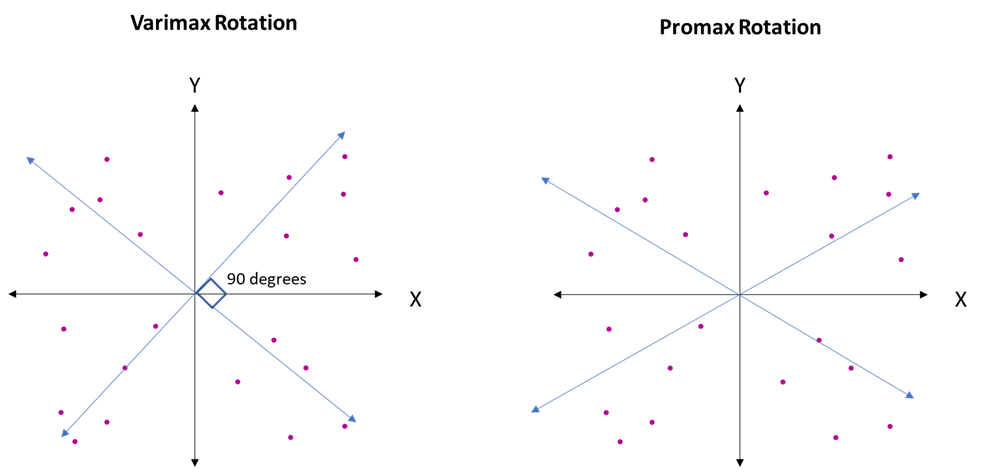



In [16]:
# Create 3-factor object with varimax rotation and fit data
fa3_varimax = FactorAnalyzer(n_factors=3, rotation="varimax", method="ml")
fact_res3_varimax = fa3_varimax.fit(df)

# Get loadings
loadings_vrimax = pd.DataFrame(
    fact_res3_varimax.loadings_,
    index=[data.columns],
    columns=["Factor 1", "Factor 2", "Factor 3"],
)

# Get factor variance
FactorVar_varimax = pd.DataFrame(
    fact_res3_varimax.get_factor_variance(),
    index=["Sum of squared loadings", "Proportional variance", "Cumulative variance"],
    columns=["Factor 1", "Factor 2", "Factor 3"],
)

# print the results
print("Loadings (varimax): \n", loadings_vrimax)
print("\nFactor Variance (varimax): \n", FactorVar_varimax)

Loadings (varimax): 
               Factor 1  Factor 2  Factor 3
Dow_Q_EX_R    0.844675  0.409035  0.169864
Pepsi_Q_EX_R  0.265763  0.731598  0.269637
REV_Q_R      -0.222476  0.094626  0.576092
GOOG_Q_EX_R   0.589017  0.474460  0.357928
BAC_Q_EX_R    0.951142 -0.060817 -0.007843
WMT_Q_EX_R   -0.049185  0.754406 -0.166020
GE_Q_EX_R     0.556886 -0.132580  0.806555
SBUX_Q_EX_R   0.166399  0.020042  0.400718

Factor Variance (varimax): 
                          Factor 1  Factor 2  Factor 3
Sum of squared loadings  2.425441  1.527419  1.400282
Proportional variance    0.303180  0.190927  0.175035
Cumulative variance      0.303180  0.494108  0.669143


In [17]:
# Create 3-factor object with promax rotation and fit data
fa3_promax = FactorAnalyzer(n_factors=3, rotation="promax", method="ml")
fact_res3_promax = fa3_promax.fit(df)

# Get loadings
loadings_promax = pd.DataFrame(
    fact_res3_promax.loadings_,
    index=[data.columns],
    columns=["Factor 1", "Factor 2", "Factor 3"],
)

# Get factor variance
FactorVar_promax = pd.DataFrame(
    fact_res3_promax.get_factor_variance(),
    index=["Sum of squared loadings", "Proportional variance", "Cumulative variance"],
    columns=["Factor 1", "Factor 2", "Factor 3"],
)

# print the results
print("Loadings (promax): \n", loadings_promax)
print("\nFactor Variance (promax): \n", FactorVar_promax)

Loadings (promax): 
               Factor 1  Factor 2  Factor 3
Dow_Q_EX_R    0.838854  0.295139 -0.019441
Pepsi_Q_EX_R  0.149968  0.696324  0.184078
REV_Q_R      -0.381839  0.072336  0.663142
GOOG_Q_EX_R   0.510798  0.378787  0.232134
BAC_Q_EX_R    1.045865 -0.188391 -0.199542
WMT_Q_EX_R   -0.098602  0.803418 -0.225001
GE_Q_EX_R     0.441448 -0.288332  0.769342
SBUX_Q_EX_R   0.089687 -0.039682  0.398610

Factor Variance (promax): 
                          Factor 1  Factor 2  Factor 3
Sum of squared loadings  2.439357  1.486367  1.369126
Proportional variance    0.304920  0.185796  0.171141
Cumulative variance      0.304920  0.490716  0.661856


From Figure 7 and Figure 8, we can compare the three-factor model with varimax or with promax. The model results of the two different rotations are very close. Their results are also close to the results with no rotation. In this example, we don't need rotation to help with factor interpretation.

### **2.5 Factor Analysis vs. Principal Component Analysis**
A lot of people often confuse factor analysis and principal component analysis. Both factor analysis and principal component analysis are dimension reduction methods. Factor analysis has factors, and principal component analysis has principal components. So what is the difference between the two methods?

Principal components from PCA are generated from a **linear combination of the variables**. <u> The purpose of PCA is to find principal components to explain as much of the total variance of the original variables as possible. </u> Factor analysis is a model to **measure factors or latent variables**. <u> The purpose of factor analysis is to find latent variables that can best explain the covariance among original variables, not the total variance of the dataset. </u>